In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dataset = [11,10,1,12,12,13,14,15,1,6,17,17,18,19,20,120,21,130,180]

(array([13.,  3.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([  1. ,  18.9,  36.8,  54.7,  72.6,  90.5, 108.4, 126.3, 144.2,
        162.1, 180. ]),
 <BarContainer object of 10 artists>)

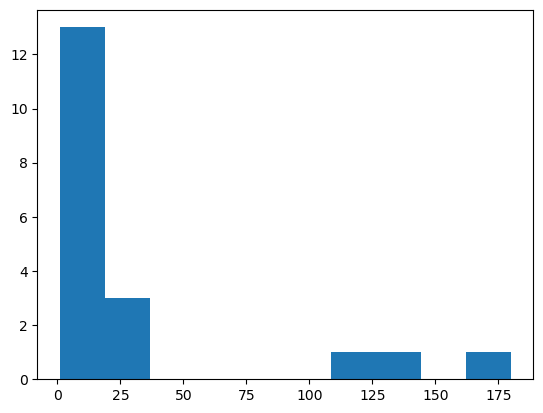

In [12]:
plt.hist(dataset)

In [13]:
outliers = []
def detect_outliers(data):
    threshold = 3 # 3rd std
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers       

In [16]:
detect_outliers(dataset)

[]

In [17]:
dataset = sorted(dataset)

In [19]:
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)

11.5 19.5


In [20]:
iqr = q3-q1

In [21]:
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
print(lower_fence,upper_fence)

-0.5 31.5


In [22]:
import seaborn as sns

<Axes: >

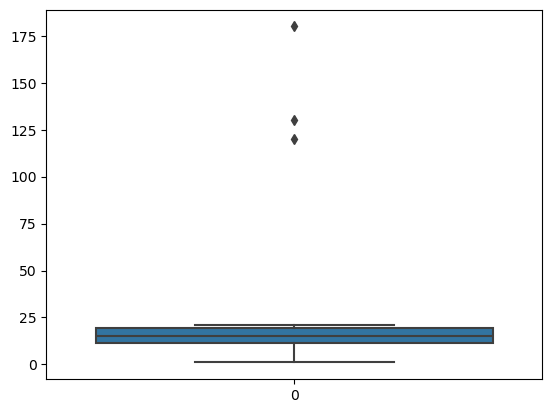

In [23]:
sns.boxplot(dataset)

In [1]:
## variance

def variance(data):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance

In [2]:
def variance(data,dof=0):
  n=len(ages)
  ## mean of the data
  mean=sum(data)/n
  ## variance
  deviation=[(x - mean) ** 2 for x in data]
  variance=sum(deviation)/(n-dof)
  return variance


In [4]:
## create a normal distributed data
import numpy as np
s=np.random.normal(0.5,0.2,100)  # (loc gives means and ; sacle is std ; size)

C:\Users\dipan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


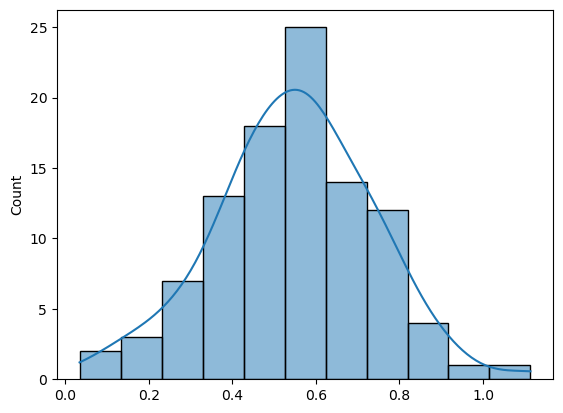

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(s,kde=True)
plt.show()

## Other Distribuiton
## Log Normal Distribution,Power Law Distribution

In [11]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 100)

C:\Users\dipan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

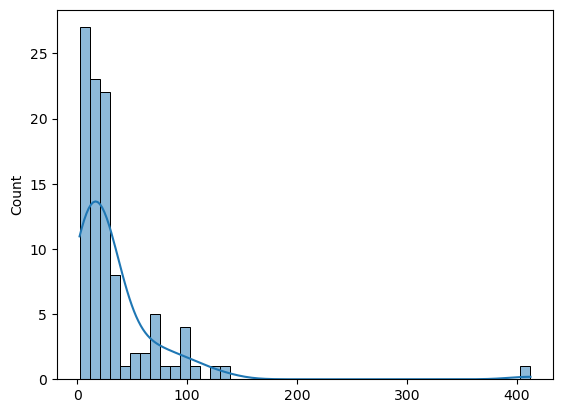

In [12]:
sns.histplot(s,kde=True)

In [13]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()


C:\Users\dipan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


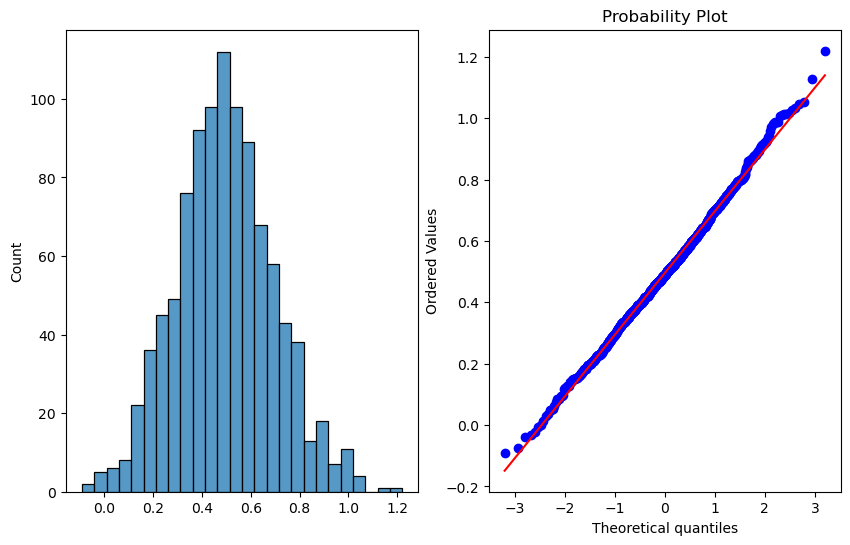

In [14]:
## create a normal distributed data
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

In [15]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [16]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

C:\Users\dipan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


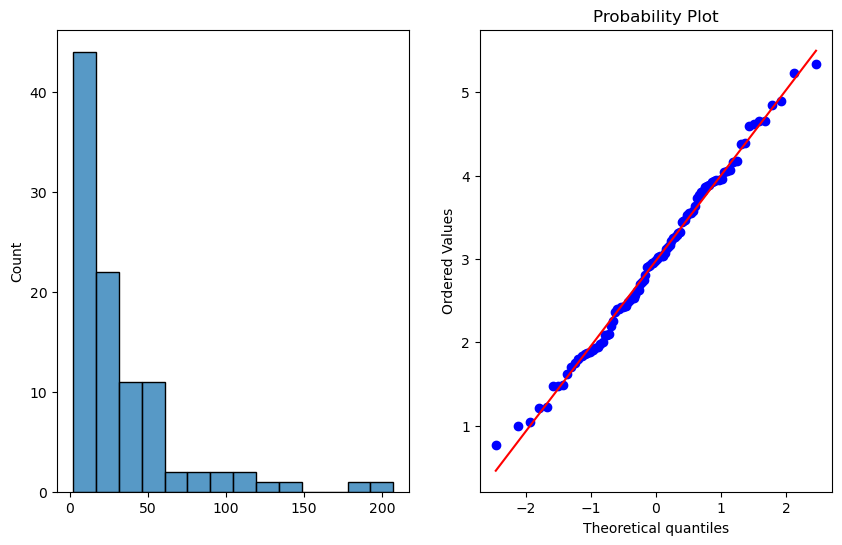

In [17]:
plot_data_log(sample)

## T-Test

In [1]:
## The average salary of a CA in india in 2019 was $100, while taking a sample of 30 participants in 2024 with the mean salary of $140 with a
##standard deviation of $20.did the salaries of CA's change from 2019 -2024? conduct a test with CI = 95%

In [1]:
from scipy import stats
import numpy as np

In [9]:
population_mean = 100
sample_size = 30
sample_mean = 140
std = 20
alpha = 0.05

#t-stat
t_stat = (sample_mean-population_mean)/(std/np.sqrt(sample_size))
print("T-stat :",t_stat)

#dregree of freedom
degree_of_freedom = sample_size-1
print("degree_of_freedom :",degree_of_freedom)

#critical value
lower = stats.t.ppf(alpha/2,degree_of_freedom)
upper = stats.t.ppf(1-alpha/2,degree_of_freedom)
print(f"lower_bound :{lower}\nUpper_bound :{upper}")

#pvalue
p_value = 2 * (1 - stats.t.cdf(abs(t_stat),degree_of_freedom))
print("p_value :",p_value)


if p_value<alpha:
    print("Reject H0")
else:
    print("Accept H0")
    

T-stat : 10.954451150103322
degree_of_freedom : 29
lower_bound :-2.0452296421327034
Upper_bound :2.045229642132703
p_value : 8.021361352916756e-12
Reject H0


In [10]:
#glassdoor    - wipro, tcs, edgeverve - 
## Two Samples T test

# Example: Comparing Test Scores of Students from Different Schools

# Suppose we have two groups of students: students from School A and students from School B. 
# We want to determine if there's a significant difference in their performance on a standardized test.

# Here's the setup:

#     Group A consists of 30 students from School A.
#     Group B consists of 30 students from School B.
#     Both schools claim that their teaching methods are superior, so we want to test if 
#     there's evidence to support either claim.

# data? - > N0,  They want to test your python
# CI - 95%

In [14]:
alpha = 0.05
scores_a = np.random.normal(loc=80,scale=4,size=30)
scores_b = np.random.normal(loc=86,scale=4,size=30)

#independent sample t-test
t_stat , p_value = stats.ttest_ind(scores_a,scores_b)

print("Test for IS T-test")
print(f"t_stat : {t_stat}")
print(f"p_value : {p_value}")

if p_value < alpha:
    print("Reject H0: There is Significant difference in Scool A and School B scores")
else:
    print("Fail to Reject: There is No Significant difference in Scool A and School B scores")
    

Test for IS T-test
t_stat : -4.898748365358828
p_value : 8.096106213931437e-06
Reject H0: There is Significant difference in Scool A and School B scores


In [15]:
# Examining the Effectiveness of a Memory Technique - wipro, tcs, edgeverve, amazon

# Suppose a group of students wants to test the effectiveness of a memory technique called "Method of Loci" 
# in improving memory retention. The method involves associating items to be remembered with specific locations 
# in a familiar environment, such as rooms in a house.

#     The students will take a memory test before and after using the Method of Loci.
#     Each student will recall a list of 20 words both before and after using the memory technique.
#     We want to determine if there's a significant improvement in memory performance after using the Method 
# of Loci


# data -> 
# ci -> 


In [18]:
before_scores = np.random.normal(loc=8,scale=4,size=30)
after_scores = np.random.normal(loc=12,scale=4,size=30)


t_stat , p_value = stats.ttest_rel(before_scores,after_scores)

print("Test for IS T-test")
print(f"t_stat : {t_stat}")
print(f"p_value : {p_value}")

if p_value < alpha:
    print("Reject H0: There is Significant difference  scores")
else:
    print("Fail to Reject: There is No Significant difference in scores")
    


Test for IS T-test
t_stat : -4.261472195975235
p_value : 0.00019588313359818635
Reject H0: There is Significant difference  scores


In [20]:
#A shampoo manufacturing company has a standard of 80 ML in each independent bottle. 
#Okay, a sample of 40 bottles were taken and the average value of fluid was measured and found to be 78ML with the standard deviation of 2.5 ml. 
#Calculate if there is indeed a problem with the machine in the factory at a confidence interval of 95%.

In [31]:
from scipy.stats import norm
pop_mean = 80
sample_mean = 78
std = 2.5
sample_size = 40
alpha = 0.05

#z_stats
z_stats = (sample_mean - pop_mean)/ (std/np.sqrt(sample_size))
print("z_stats :", z_stats)

#z_critical
lower = norm.ppf(alpha/2)
upper = norm.ppf(1-alpha/2)
print(f"upper : {upper:.3f}\nlower :{lower:.3f}")

p_value = 2*(1 - norm.cdf(abs(z_stats)))
print("p_value",p_value)


if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to Reject")

z_stats : -5.059644256269407
upper : 1.960
lower :-1.960
p_value 4.200393977082939e-07
Reject H0


In [2]:
#In a sample survey conducted in Bangalore, it was found that 960 people out of 1860 
#people were vegetarians and the rest were non-vegetarians. 
#Can you find out if vegetarians and non-vegetarians are equally popular in Bangalore at 1% level of significance


#30 - 70

In [6]:
from statsmodels.stats.proportion import proportions_ztest
#from scipy.stats import proportions_ztest


#data
veg_count = 960
total_count = 1860

p_hat = veg_count/total_count
print("p_hat",p_hat)

alpha=0.01

z_stat, p_value = proportions_ztest(count=veg_count,nobs=1860,
                                    value=0.50,alternative='two-sided')     #nobs = total  

print("p_value",p_value)
print("z_stat",z_stat)

if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to Reject")

p_hat 0.5161290322580645
p_value 0.16394023748003028
z_stat 1.3919410907075043
Fail to Reject


### F-Test

In [19]:
# GOODDAY AND PARLE G PROBLEM
import numpy as np
from scipy.stats import f

n1 = 10
n2=13
x1 = 15
x2 = 14
ssd1 = 90
ssd2 = 108


#variance
var_g = ssd1/(n1-1)
var_p = ssd2/(n2-1)
print("Variance of G :",var_g)
print("Variance of P :",var_p)

#F-stat
F_stat = max(var_g,var_p)/min(var_g,var_p)
print(f"F-stat :{F_stat:.3f}")

alpha = 0.05
# Critical
dfg=n1-1
dfp=n2-1


f_critical = f.ppf(1-alpha/2,dfg,dfp)
print("F_critical:" , f_critical)

p_value = f.cdf(F_stat,dfg,dfp)
print("p_value:" , p_value)

if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to Reject")


Variance of G : 10.0
Variance of P : 9.0
F-stat :1.111
F_critical: 3.435845641861058
p_value: 0.5774577638888669
Fail to Reject


## Chi Square

In [22]:
observed = [23,16,14,19,28]
expected = [20,20,20,20,20]

chi_stats = 0   # initailzing to 0

for observed_val, expected_val in zip(observed,expected):
    chi_stats += ((observed_val - expected_val)**2)/expected_val

print("Chi-stats :",chi_stats)


Chi-stats : 6.3


In [23]:
list(zip(observed,expected))

[(23, 20), (16, 20), (14, 20), (19, 20), (28, 20)]

In [30]:
from scipy.stats import chi2

df = 4
alpha = 0.05

chi_critical = chi2.ppf(1 - alpha,df)
print("Chi_critical :",chi_critical)

p_value = 1 - chi2.cdf(chi_stats,df)
print("p_value :",p_value)

if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to Reject/Accept H0")

Chi_critical : 9.487729036781154
p_value : 0.1778363264982168
Fail to Reject/Accept H0


## Annova

In [31]:
#fertilizers
from scipy.stats import f_oneway

fertlizer_A = [11, 13, 12, 14, 14, 13, 15, 14]
fertlizer_B = [10, 11, 13, 12, 11, 14, 14, 12]
fertlizer_C = [20, 21, 23, 24, 26, 21, 20, 21]

f_stats, p_value = f_oneway(fertlizer_A,fertlizer_B,fertlizer_C)

alpha = 0.05 #95%

if p_value < alpha:
    print("Reject H0: There are significant diff in mean heights of plants ")
else:
    print("Fail to Reject / Accept: There are no significant diff in mean heights of plants")

Reject H0: There are significant diff in mean heights of plants 


In [32]:
# H0 : a = b = c
# h1 : a!= b !=c 
f_a = np.mean(fertlizer_A)
f_a

13.25

In [33]:
np.mean(fertlizer_B)

12.125

In [34]:
np.mean(fertlizer_C)

22.0